**Author** : Jeferson Magalhães dos Santos

**[E-mail](mailto:jefersonmdossantos@gmail.com) | [GitHub](https://github.com/jefersonmglh) | [Linkedin](https://www.linkedin.com/in/jeferson-magalh%C3%A3es-64b8b8133/)**

#  <a name="indice"> Index </a>

* [Summary](#resumo)
* [1. Packages Imports](#1)
* [2. Data Loading and Preparation](#2)
* [3. Race Overview](#3)
  * [3.1 Positions per Lap](#3.1)
  * [3.2 Global Racepace](#3.2)
  * [3.3 Type Strategies](#3.3)
  * [3.4 Delta to race winner](#3.4)
  * [3.5. Race Start](#3.5)
* [5. Tyre Degratation](#5)
  * [5.1 Laptime's Fuel Correction](#5.1)
  * [5.2 Team's tyre degratation](#5.2)
* [6. Speeds Comparision](#6)
  * [6.1 Speed's distribution](#6.1)
  * [6.2 Min/Max Speeds of each driver of fastest lap](#6.2)
  * [6.3 Team's speed analysis](#6.3)


#  <a name="resumo"> Summary </a>
[Back to index](#indice)

""

#  <a name="1">1. Packages Imports </a>
[Back to index](#indice)

In [1]:
%pip install fastf1
%pip install --upgrade pandas
%pip install --upgrade matplotlib
%pip install --upgrade seaborn
#basic
import pandas as pd
import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl()
pd.set_option('display.max_columns', None)

#graph
import matplotlib.pyplot as plt
import seaborn as sns


fastf1.Cache.enable_cache('/content/sample_data')

# colour palettes per driver
driver_pal = {
    'VER': '#0600EF',
    'PER': '#0600EF',

    'ALO': '#006F62',
    'STR': '#006F62',

    'LEC': '#DC0000',
    'SAI': '#DC0000',

    'HAM': '#00D2BE',
    'RUS': '#00D2BE',

    'BOT': '#900000',
    'ZHO': '#900000',

    'GAS': '#0090FF',
    'OCO': '#0090FF',

    'ALB': '#005AFF',
    'SAR': '#005AFF',

    'TSU': '#2B4562',
    'DEV': '#2B4562',

    'HUL': '#FFFFFF',
    'MAG': '#FFFFFF',

    'NOR': '#FF8700',
    'PIA': '#FF8700'
}

# colour palettes per team
team_pal = {
    'Red Bull Racing': '#0600EF',
    'Aston Martin': '#006F62',
    'Ferrari': '#DC0000',
    'Mercedes': '#00D2BE',
    'Alfa Romeo': '#900000',
    'Alpine': '#0090FF',
    'Williams': '#005AFF',
    'AlphaTauri': '#2B4562',
    'Haas F1 Team': '#FFFFFF',
    'McLaren': '#FF8700'
}




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.

#  <a name="2">2. Data Loading and Preparation</a>
[Back to index](#indice)

In [2]:
race_name = 'Miami'

In [3]:
race = fastf1.get_session(2023, race_name, 'Race')
race.load()


drivers_result_abb = race.results['Abbreviation']

#making DF
df_race = pd.DataFrame(race.laps)

#drop null values on LapTime column
df_race = df_race.dropna(subset=['LapTime'])

#drop not accurate times and pitstop's laps
df_race = df_race[df_race['IsAccurate'] == True]
cols = ['PitOutTime', 'PitInTime']
df_race = df_race[df_race[cols].isna().all(1)]

#driver number to Int Type
df_race = df_race.astype({"DriverNumber": int, "IsPersonalBest": bool})
df_race.head()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.4]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.0.4]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for lap_count. L

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:06:02.570000,VER,1,0 days 00:01:34.260000,2.0,1.0,NaT,NaT,0 days 00:00:32.857000,0 days 00:00:35.277000,0 days 00:00:26.126000,0 days 01:05:01.145000,0 days 01:05:36.422000,0 days 01:06:02.548000,NaN,184.0,271.0,295.0,True,HARD,2.0,True,Red Bull Racing,0 days 01:04:28.310000,2023-05-07 19:35:29.568,1,8.0,False,,False,True
2,0 days 01:07:36.697000,VER,1,0 days 00:01:34.127000,3.0,1.0,NaT,NaT,0 days 00:00:32.337000,0 days 00:00:35.896000,0 days 00:00:25.894000,0 days 01:06:34.885000,0 days 01:07:10.781000,0 days 01:07:36.675000,215.0,183.0,285.0,286.0,True,HARD,3.0,True,Red Bull Racing,0 days 01:06:02.570000,2023-05-07 19:37:03.828,1,8.0,False,,False,True
3,0 days 01:09:09.632000,VER,1,0 days 00:01:32.935000,4.0,1.0,NaT,NaT,0 days 00:00:32.042000,0 days 00:00:34.996000,0 days 00:00:25.897000,0 days 01:08:08.717000,0 days 01:08:43.713000,0 days 01:09:09.610000,213.0,185.0,273.0,309.0,True,HARD,4.0,True,Red Bull Racing,0 days 01:07:36.697000,2023-05-07 19:38:37.955,1,6.0,False,,False,True
4,0 days 01:10:42.507000,VER,1,0 days 00:01:32.875000,5.0,1.0,NaT,NaT,0 days 00:00:32.029000,0 days 00:00:34.998000,0 days 00:00:25.848000,0 days 01:09:41.639000,0 days 01:10:16.637000,0 days 01:10:42.485000,NaN,186.0,274.0,309.0,True,HARD,5.0,True,Red Bull Racing,0 days 01:09:09.632000,2023-05-07 19:40:10.890,1,6.0,False,,False,True
5,0 days 01:12:15.260000,VER,1,0 days 00:01:32.753000,6.0,1.0,NaT,NaT,0 days 00:00:31.893000,0 days 00:00:35.037000,0 days 00:00:25.823000,0 days 01:11:14.378000,0 days 01:11:49.415000,0 days 01:12:15.238000,211.0,185.0,281.0,307.0,True,HARD,6.0,True,Red Bull Racing,0 days 01:10:42.507000,2023-05-07 19:41:43.765,1,6.0,False,,False,True


#  <a name="3">3. Race Overview</a>
[Back to index](#indice)

> ####  <a name="3.1">3.1 Positions per lap</a>
[Back to index](#indice)

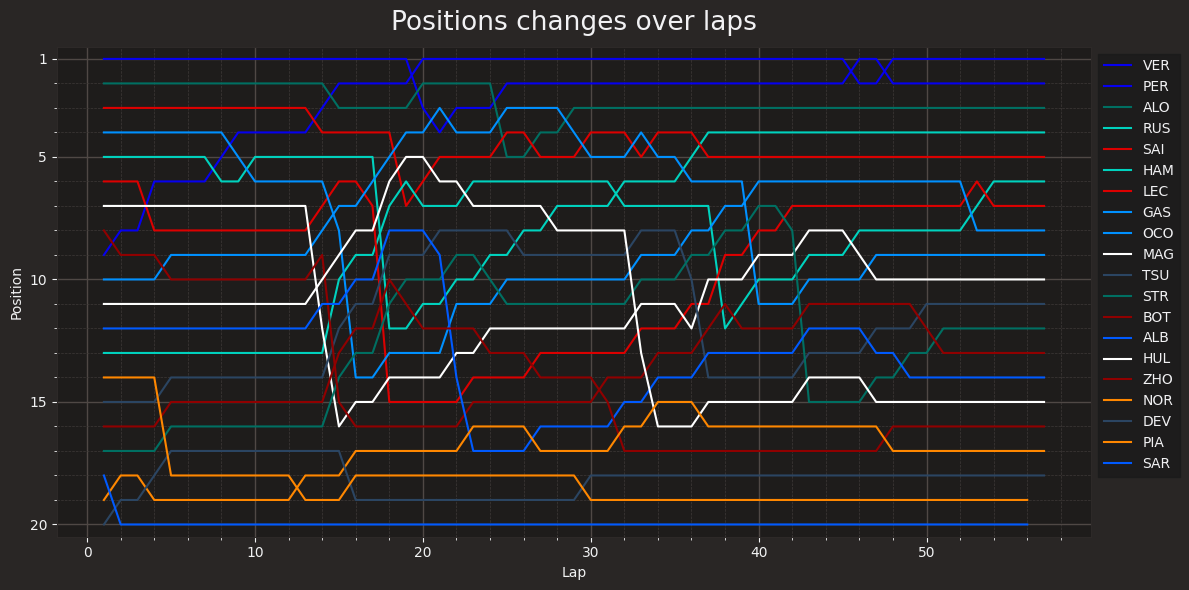

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = driver_pal[abb]

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
plt.title('Positions changes over laps')
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

> ####  <a name="3.2">3.2 Global Racepace</a>
[Back to index](#indice)

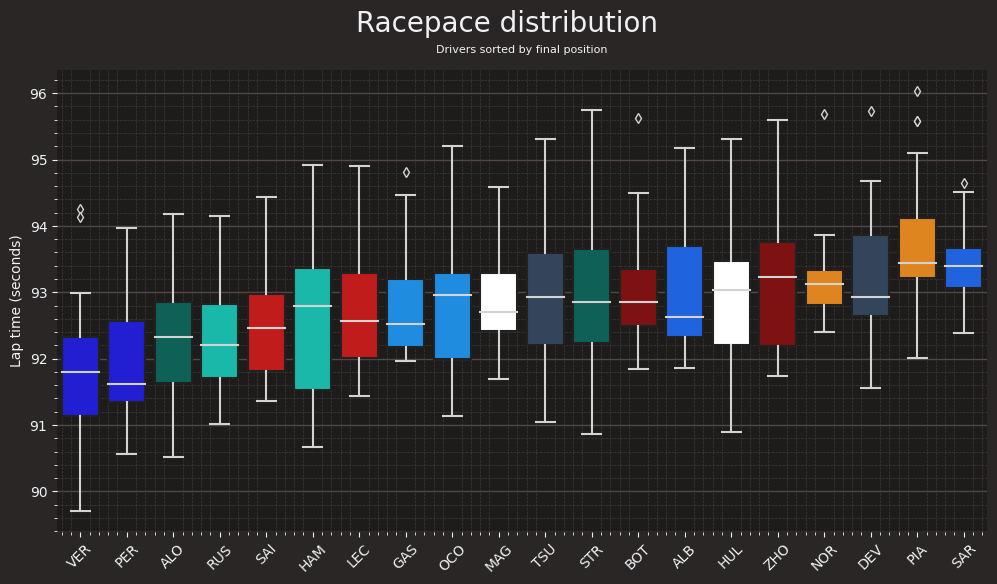

In [5]:
#Box plot
df_laptimes = df_race[['Driver', 'LapNumber', 'LapTime', 'Team', 'Compound','Position']]
df_laptimes.loc[:,'LapTime'] = df_laptimes.loc[:,'LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(12,6))

c = 'lightgrey'
sns.boxplot(
    x=df_laptimes['Driver'],
    y =df_laptimes['LapTime'],
    ax=ax,
    palette=driver_pal,
    order=drivers_result_abb,
    capprops=dict(color=c),
    whiskerprops=dict(color=c),
    flierprops=dict(color=c, markeredgecolor=c),
    medianprops=dict(color=c),
    )

plt.suptitle('Racepace distribution', fontsize=20, ha='center')
plt.title("Drivers sorted by final position", fontsize=8, loc='center')
plt.xticks(rotation=45)
plt.ylabel('Lap time (seconds)')
plt.xlabel('')



sns.despine(left=True, bottom=True)
plt.show()

> ####  <a name="3.3">3.3 Tyre Strategies</a>
[Back to index](#indice)

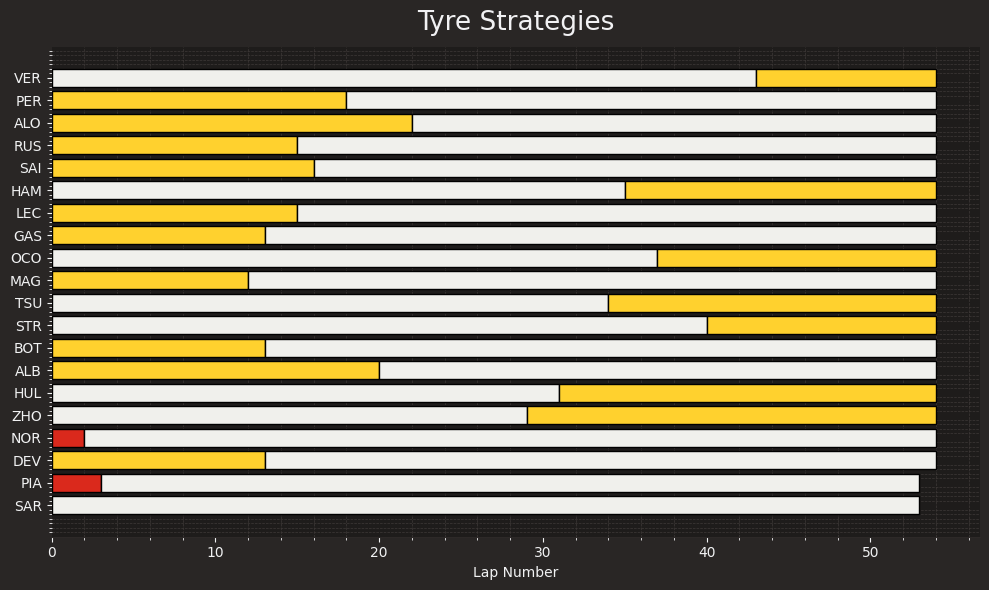

In [6]:
stints = df_race[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"]).count().reset_index()

fig, ax = plt.subplots(figsize=(10,6))

for drv in drivers_result_abb:
  drv_stint = stints[stints['Driver']==drv]
  previous = 0
  for i, r in drv_stint.iterrows():
    plt.barh(
            y=drv,
            width=r["LapNumber"],
            left=previous,
            color=fastf1.plotting.COMPOUND_COLORS[r["Compound"]],
            edgecolor="black",
            fill=True
        )
    previous += r["LapNumber"]


plt.title("Tyre Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

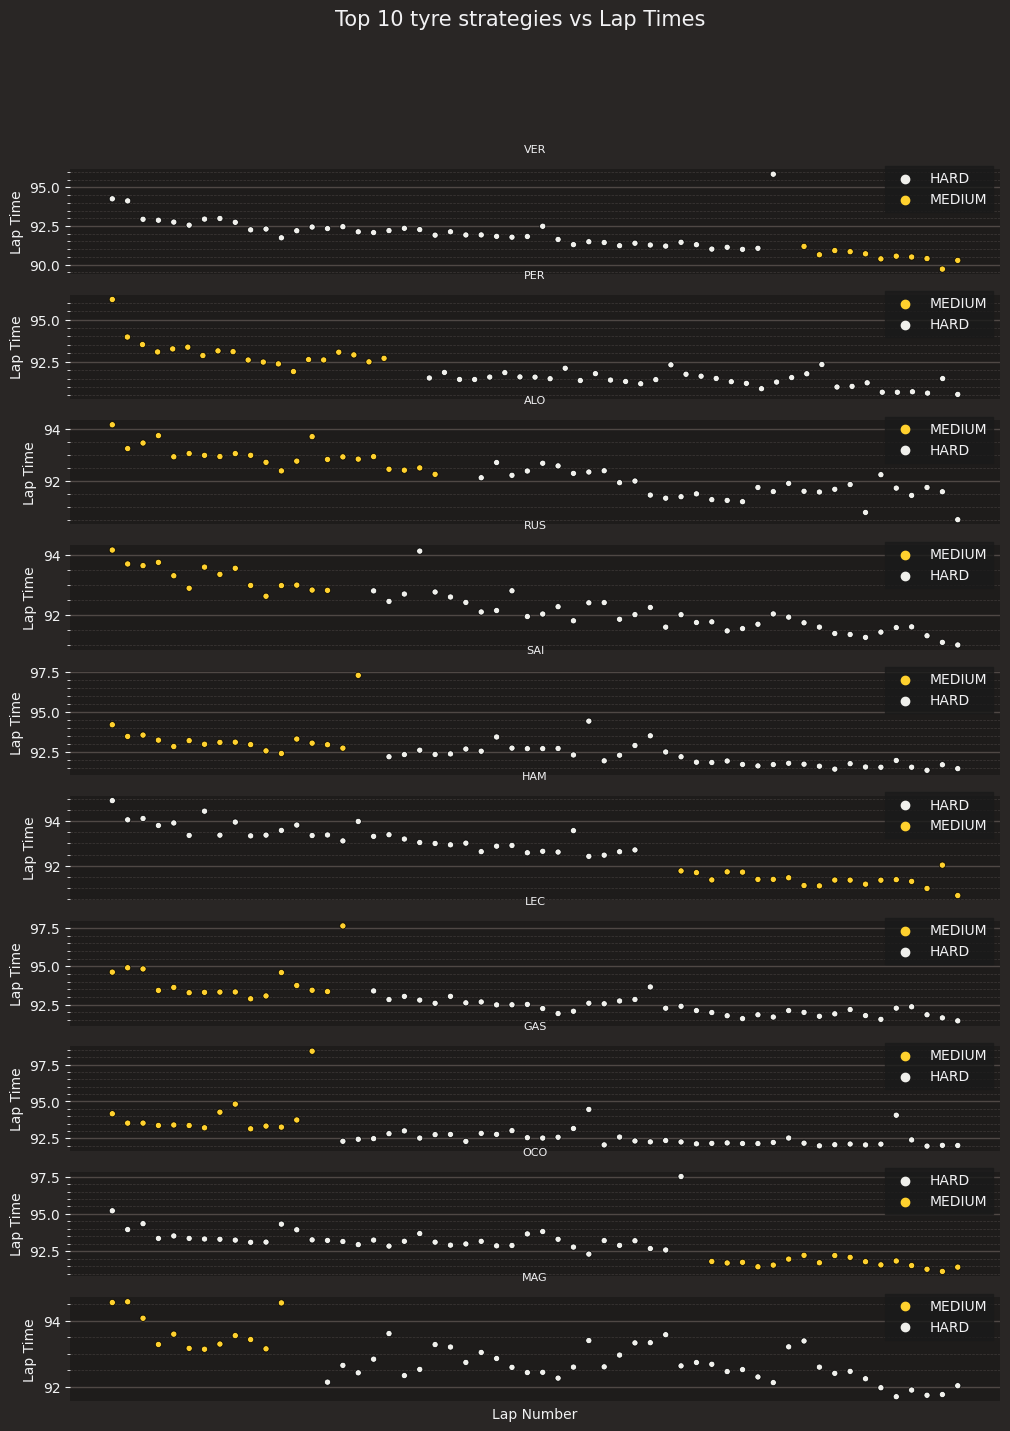

In [7]:
fig, axs = plt.subplots(10, figsize=(12,16))

drivers_result_abb[:10]

for i, drv in enumerate(drivers_result_abb[:10]):
  driver_laps = race.laps.pick_driver(drv).pick_quicklaps().reset_index()
  driver_laps['Laptime(s)'] = driver_laps['LapTime'].dt.total_seconds()
  sns.scatterplot(data=driver_laps,
                  x="LapNumber",
                  y="Laptime(s)",
                  hue="Compound",
                  palette=fastf1.plotting.COMPOUND_COLORS,
                  s=20,
                  linewidth=0.5,
                  edgecolor = 'black',
                  ax=axs[i]
                  )
  axs[i].legend(bbox_to_anchor=(1, 1.1))
  axs[i].set_title(f'{drv}', fontsize=8)
  axs[i].set_ylabel('Lap Time')
  axs[i].set_xlabel('')
  axs[i].set_xticks([])



plt.xlabel("Lap Number")
plt.ylabel("Lap Time")

plt.suptitle("Top 10 tyre strategies vs Lap Times", fontsize=15)
sns.despine(left=True, bottom=True)

# plt.tight_layout()
plt.show()



> ####  <a name="3.4">3.4 Delta to race winner</a>
[Back to index](#indice)

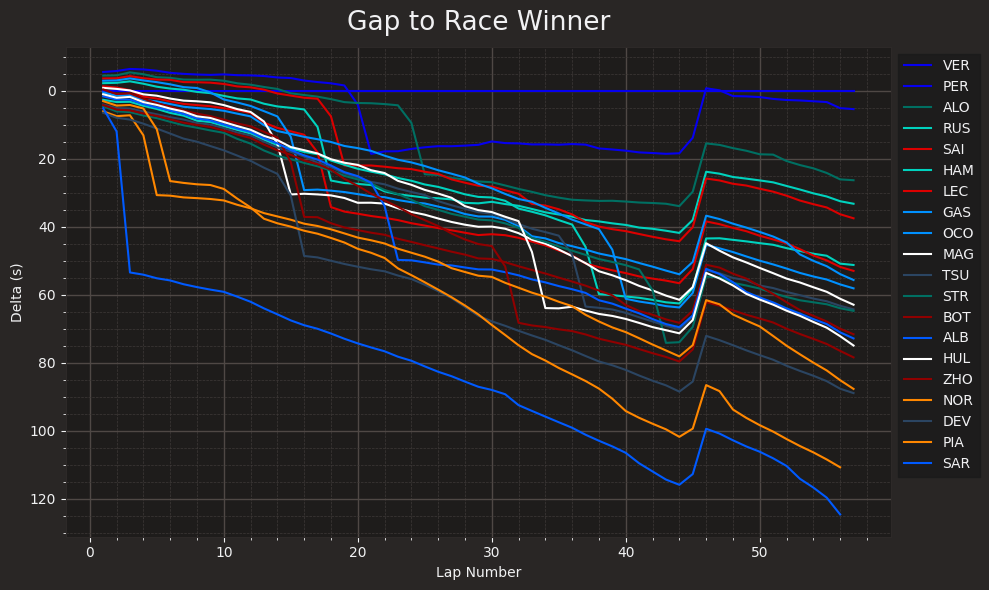

In [8]:
full_df = race.laps
winner_df = full_df[full_df['Driver'] == drivers_result_abb[0]].copy().reset_index()
winner_df['Time'] = winner_df['Time'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(10,6))

for drv in drivers_result_abb:
    drv_df = full_df[full_df['Driver'] == drv].copy().reset_index()
    drv_time = drv_df['Time'].dt.total_seconds()
    delta = drv_time - winner_df['Time']
    delta = delta.dropna()



    ax.plot(drv_df.LapNumber, delta, label=drv, color=driver_pal[drv])



ax.invert_yaxis()

plt.xlabel('Lap Number')
plt.ylabel('Delta (s)')
plt.title('Gap to Race Winner')
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

> ####  <a name="3.5">3.4 Race Start </a>
[Back to index](#indice)

In [9]:
bank = {}

for drv in drivers_result_abb:
  tele = race.laps.pick_driver(drv).telemetry
  tele.reset_index(inplace=True)
  time1 = tele.iloc[1]['Time']

  data = []
  for speed in [100,200]:
    time2 = tele[tele['Speed'] >= speed].iloc[0]['Time']
    time_to_speed = time2 - time1
    data.append(time_to_speed.total_seconds())
  bank[drv] = data

df_start = pd.DataFrame.from_dict(bank, orient='index', columns=['0 - 100 km/h', '0 - 200 km/h'])
df_start = df_start.sort_values('0 - 100 km/h', ascending=True).reset_index()
df_start.rename(columns={'index': 'Driver'}, inplace=True)
df_start_100 = df_start.iloc[:, :2].sort_values(by='0 - 100 km/h').set_index('Driver')
df_start_200 = df_start.iloc[:, [0,2]].sort_values(by='0 - 200 km/h').set_index('Driver')

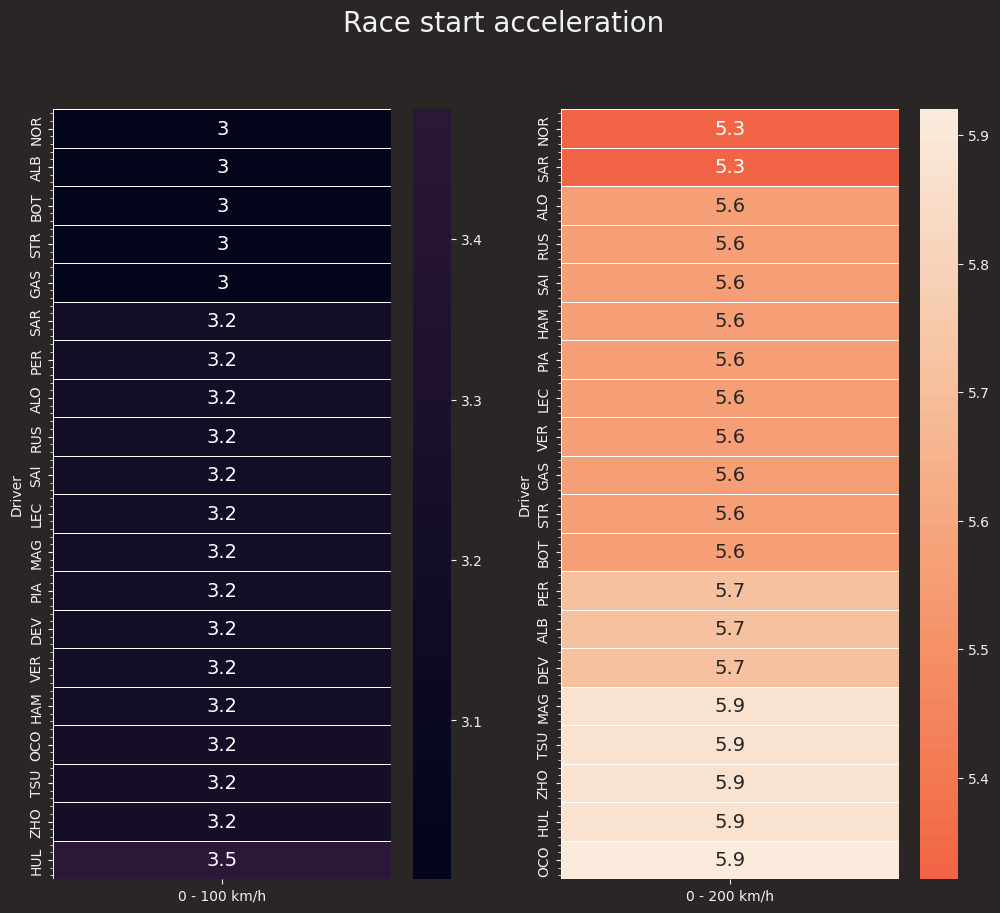

In [10]:
fig, axs = plt.subplots(1,2, figsize = (12,10))

for i, df in enumerate([df_start_100, df_start_200]):
  sns.heatmap(
      df,
      cmap='rocket',
      annot=True,
      linewidths=0.5,
      edgecolor='black',
      center=5,
      annot_kws={'size': 14},
      ax=axs[i])

plt.suptitle("Race start acceleration", fontsize=20, ha='center')
plt.show()

#  <a name="5">5. Tyre Degratation</a>
[Back to index](#indice)

> ####  <a name="5.1">5.1 Laptime's Fuel Correction</a>
[Back to index](#indice)

https://tracinginsights.substack.com/p/ferrari-disaster-class-is-hard-compound?showWelcome=True

https://www.reddit.com/r/F1Technical/comments/11oskuy/computation_of_fuelcorrected_lap_time/

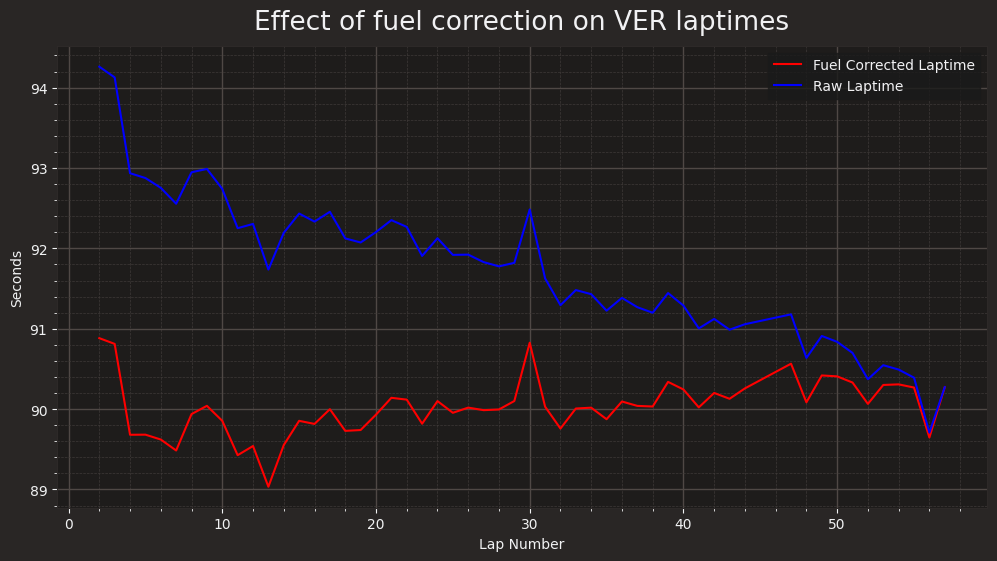

In [11]:
def fuel_correction(df, total_laps:int=race.total_laps):
  w_init = 110  # kg
  w_final = 10  # kg
  time_loss_factor = 0.035  # s/kg
  consumption = (w_init - w_final) / total_laps # kg/lap

  df['Fuel_Corrected_Laptimes'] = df['Laptime(s)'] - ((total_laps - df['LapNumber'] ) * consumption * time_loss_factor)
  return df


fuel_correc = df_race.copy()
fuel_correc['Laptime(s)'] = fuel_correc['LapTime'].dt.total_seconds()
fuel_corrected = fuel_correction(df=fuel_correc)

ver_lapt = fuel_corrected[fuel_corrected['Driver'] == 'VER']

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ver_lapt['LapNumber'], ver_lapt['Fuel_Corrected_Laptimes'], 'r', label='Fuel Corrected Laptime')
ax.plot(ver_lapt['LapNumber'], ver_lapt['Laptime(s)'], 'b', label='Raw Laptime')
plt.legend()
plt.ylabel('Seconds')
plt.xlabel('Lap Number')
plt.title('Effect of fuel correction on VER laptimes')
plt.show()

> ####  <a name="5.2">5.2 Team's tyre degratation</a>
[Back to index](#indice)

In [12]:
# df = pd.DataFrame.from_dict(data_dict)
# sns.lmplot(
#     data=df,
#     x='TyreLife',
#     y='Lapseconds_fuelcorrected',
#     hue='Team',
#     col='Compound',

#     scatter_kws={'alpha': 0.15, 's': 50},
#     line_kws={'alpha': 1, 'lw': 4},
#     height=10, aspect=0.7
# )

In [13]:
# fuel_correction = 0.035
# total_laps=57

# tyre_deg = df_race.loc[:, ['Driver', 'Team', 'LapNumber', 'LapTime', 'Compound', 'TyreLife']]
# tyre_deg['Lapseconds'] = tyre_deg['LapTime'].dt.total_seconds()

# tyre_deg = tyre_deg[tyre_deg['Compound'] != 'MEDIUM']

# # subtracting the effect of the mass of the fuel left in the car
# tyre_deg['FuelMassEffect'] = tyre_deg.groupby('Driver', sort=False)['LapNumber'] \
#     .apply(lambda x: (total_laps-x)*fuel_correction)

# # subtracting lap time by the above
# tyre_deg['Lapseconds_fuelcorrected'] = tyre_deg.groupby('Driver', sort=False).apply(
#         lambda x: x['Lapseconds']-x['FuelMassEffect']
#     ).values

# # get average lap seconds per compound per tyre life
# tyres_teams = tyre_deg.loc[
#     (tyre_deg['Team'] == "Mercedes") |
#     (tyre_deg['Team'] == "Aston Martin") |
#     (tyre_deg['Team'] == "Ferrari") |
#     (tyre_deg['Team'] == "Red Bull Racing")]


# sns.lmplot(
#     data=tyres_teams,
#     x='TyreLife',
#     y='Lapseconds_fuelcorrected',
#     hue='Team',
#     col='Compound',
#     palette=team_pal,

#     scatter_kws={'alpha': 0.15, 's': 50},
#     line_kws={'alpha': 1, 'lw': 4},
#     height=10, aspect=0.7
# )


# plt.show()

#  <a name="6">6. Speed Comparison</a>
[Back to index](#indice)

> ####  <a name="6.1">6.1 Speed's distribution</a>
[Back to index](#indice)

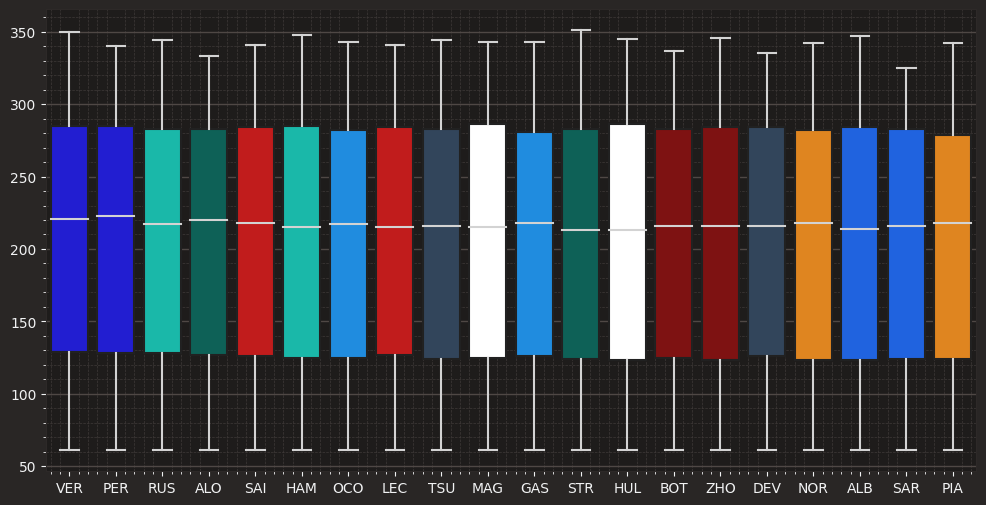

In [14]:
speed_data = {}
for driver in race.drivers:
  driver_telemetry = race.laps.pick_driver(driver).pick_quicklaps().telemetry

  speed_list = driver_telemetry['Speed'].to_list()

  driver_name = df_race[df_race['DriverNumber'] == int(driver)]['Driver'].iloc[0]

  speed_data[driver_name] = speed_list

max_length = max(len(value) for value in speed_data.values())


for key, value in speed_data.items():
    if len(value) < max_length:
        value.extend([None] * (max_length - len(value)))

df = pd.DataFrame.from_dict(speed_data)
df = df[df > 60]

order = df.mean().sort_values(ascending=False).index.to_list()


fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(
    data = df,
    palette=driver_pal,
    ax=ax,
    order=order,
    capprops=dict(color=c),
    whiskerprops=dict(color=c),
    flierprops=dict(color=c, markeredgecolor=c),
    medianprops=dict(color=c),)

plt.show()


> ####  <a name="6.2">6.2 Min/Max Speeds of each driver of fastest lap</a>
[Back to index](#indice)

In [15]:
speed_data = {}
for driver in race.drivers:
  driver_telemetry = race.laps.pick_driver(driver).pick_fastest().telemetry
  max_speed = driver_telemetry['Speed'].max()
  min_speed = driver_telemetry['Speed'].min()
  driver_name = df_race[df_race['DriverNumber'] == int(driver)]['Driver'].iloc[0]

  speed_data[driver_name] = (min_speed, max_speed)


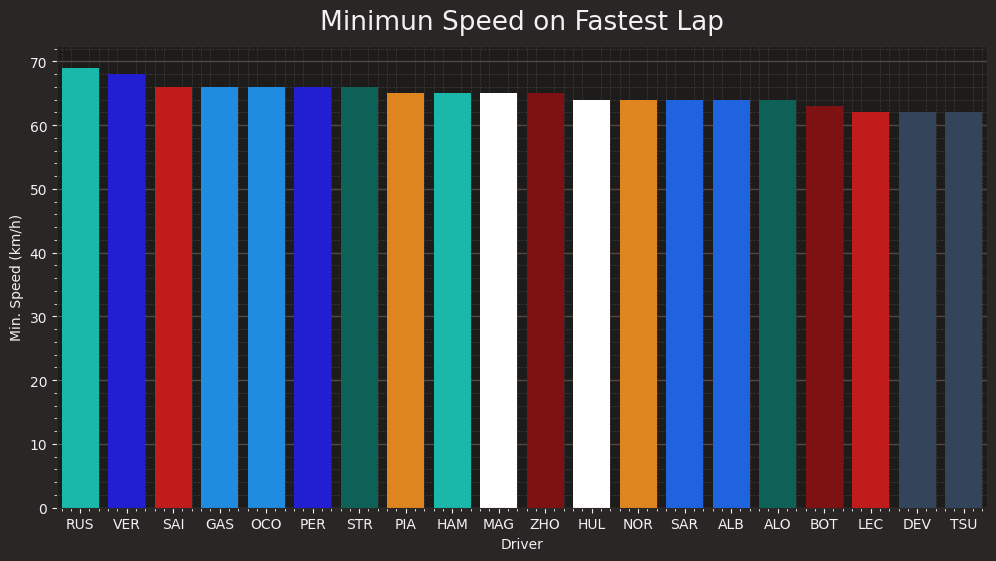

In [16]:
df_min_max_speeds = pd.DataFrame.from_dict(speed_data, orient='index', columns=['MinSpeed', 'MaxSpeed']).reset_index().rename(columns={'index': 'Driver'})

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = df_min_max_speeds.sort_values('MinSpeed', ascending=False), palette=driver_pal, x='Driver', y='MinSpeed', ax=ax)

plt.ylabel('Min. Speed (km/h)')
plt.title('Minimun Speed on Fastest Lap')
plt.show()

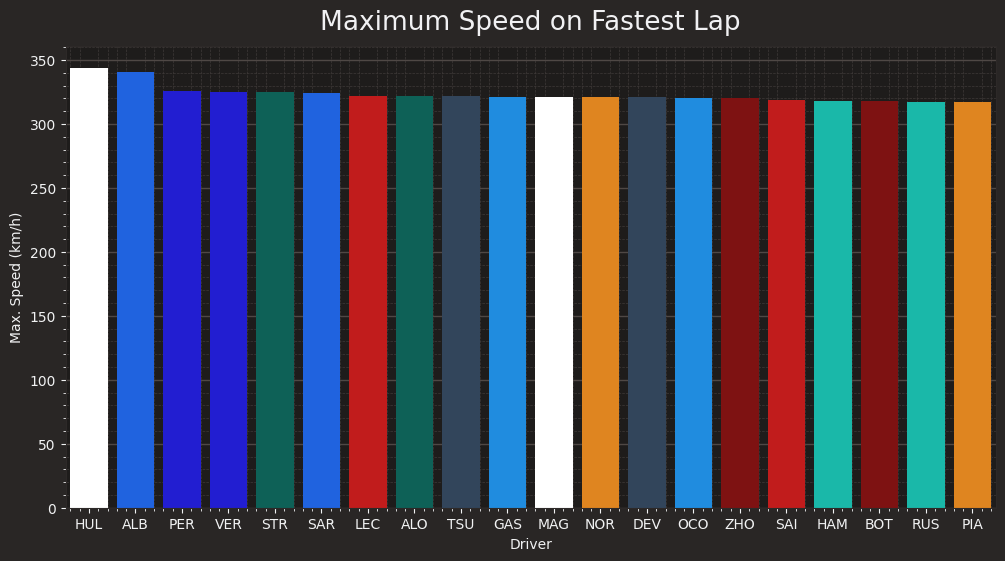

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = df_min_max_speeds.sort_values('MaxSpeed', ascending=False), palette=driver_pal, x='Driver', y='MaxSpeed', ax=ax)

plt.ylabel('Max. Speed (km/h)')
plt.title('Maximum Speed on Fastest Lap')
plt.show()

In [18]:
top_mean_min_speed_data = {}

for driver in driver_pal.keys():
  top_mean_min_speed_data[driver] = {}
  s = df_race[df_race['Driver'] == driver].sort_values('LapTime').iloc[:10,:].reset_index(drop=True)
  for i, r in s.iterrows():
    start_time = r.LapStartDate
    final_time = start_time + r.LapTime

    driver_tele = pd.DataFrame(race.laps.pick_driver(driver).telemetry)
    driver_tele_filtered = driver_tele[driver_tele['Date'].between(start_time, final_time)]

    top_mean_min_speed_data[driver][i] = [driver_tele_filtered['Speed'].max(), driver_tele_filtered['Speed'].mean(), driver_tele_filtered['Speed'].min() ]



df_speed_all = pd.DataFrame.from_dict({(i,j): top_mean_min_speed_data[i][j]
                             for i in top_mean_min_speed_data.keys()
                             for j in top_mean_min_speed_data[i].keys()}, orient='index')


df_speed_all.index = pd.MultiIndex.from_tuples(df_speed_all.index)
df_speed_all.columns = ['max', 'mean', 'min']
df_speed_all.index.names = ['driver', 'lap']



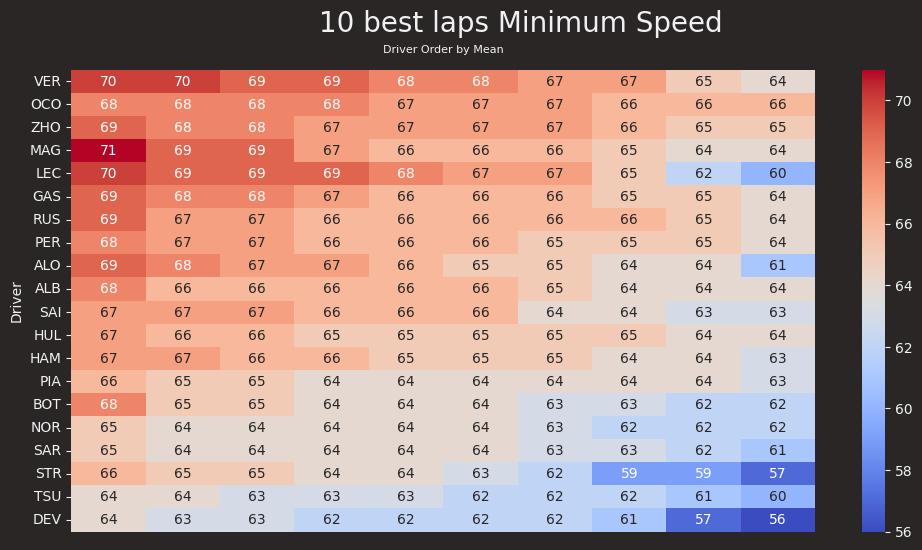

In [19]:
df_minimas = df_speed_all['min'].unstack().transpose().reset_index(drop=True)
df_minimas = df_minimas.apply(lambda x: x.sort_values(ascending=False).reset_index(drop=True), axis=0).transpose()

order = df_minimas.mean(axis=1).sort_values(ascending=False).index

df_ordered = df_minimas.loc[order]
plt.figure(figsize=(12, 6))
sns.heatmap(df_ordered, cmap='coolwarm', annot=True, fmt=".0f", cbar=True)
plt.title("Driver Order by Mean", fontsize=8)
plt.suptitle('10 best laps Minimum Speed', fontsize=20, ha='center')
plt.ylabel("Driver")
plt.xticks([])

plt.show()



> ####  <a name="6.3">6.3 Team's speed analysis</a>
[Back to index](#indice)

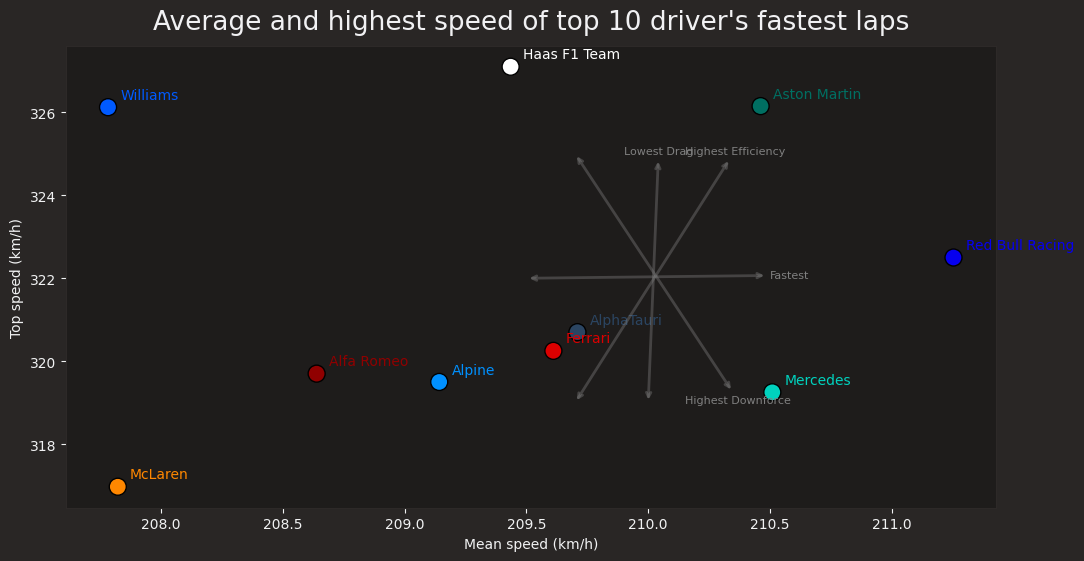

In [20]:
df = df_speed_all.reset_index().drop(columns=['lap'])
df = df.rename(columns={'driver': 'Driver'})

df1 = df.merge(df_race[['Driver', 'Team']], on='Driver', how='left')
df1 = df1[['Team', 'min', 'max', 'mean']].groupby('Team').mean().reset_index()




plt.figure(figsize=(12, 6))

scatter = sns.scatterplot(
    data=df1,
    x='mean',
    y='max',
    hue='Team',
    palette=team_pal,
    s=150,
    edgecolor='black'
)

#team's text
for i in range(df1.shape[0]):
    scatter.text(
        x=df1['mean'][i]+0.05,
        y=df1['max'][i]+0.2,
        s=df1['Team'][i],
        fontdict=dict(color=team_pal[df1['Team'][i]],size=10)

    )

#plot config

plt.title("Average and highest speed of top 10 driver's fastest laps")
scatter.set(xlabel='Mean speed (km/h)')
scatter.set(ylabel='Top speed (km/h)')
scatter.get_legend().remove()


x_min, x_max = scatter.get_xlim()
y_min, y_max = scatter.get_ylim()


x_mean = round(((x_min + x_max) / 2),0)
y_mean = round(((y_min + y_max) / 2),0)
x_quarter = round(((x_max - x_min)/4),0)
y_quarter = round(((y_max - y_min)/4),0)

color = 'gray'
arrowprops = {'arrowstyle': '<->', 'linewidth': 2, 'color': color, 'alpha': 0.4}
plt.annotate('Fastest', xy=((x_mean - 0.5*x_quarter), y_mean), xytext=(x_mean + 0.5*x_quarter, y_mean), arrowprops=arrowprops, fontsize=8,color=color)
plt.annotate('Lowest Drag', xy=(x_mean, y_mean - y_quarter), xytext=(x_mean - 0.10, y_mean + y_quarter), arrowprops=arrowprops, fontsize=8,color=color)
plt.annotate('Highest Efficiency', xy=(x_mean - 0.3*x_quarter, y_mean - y_quarter), xytext=(x_mean + 0.3*x_quarter - 0.15, y_mean + y_quarter), arrowprops=arrowprops,fontsize=8,color=color)
plt.annotate('Highest Downforce', xy=(x_mean - 0.3*x_quarter, y_mean + y_quarter), xytext=(x_mean + 0.3*x_quarter - 0.15, y_mean - y_quarter), arrowprops=arrowprops,fontsize=8,color=color)



plt.show()